# **Rent 데이터셋**

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
# rent.csv 파일이 이미 있는 상태에요!
rent_df = pd.read_csv( '/content/drive/MyDrive/KDT/6. 머신러닝과 딥러닝/Data/rent.csv')
rent_df

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2.0,10000,1100.0,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2.0,20000,800.0,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2.0,17000,1000.0,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,NaN,10000,800.0,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2.0,7500,850.0,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2.0,15000,1000.0,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3.0,29000,2000.0,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3.0,35000,1750.0,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3.0,45000,1500.0,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


In [5]:
rent_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Posted On          4746 non-null   object 
 1   BHK                4743 non-null   float64
 2   Rent               4746 non-null   int64  
 3   Size               4741 non-null   float64
 4   Floor              4746 non-null   object 
 5   Area Type          4746 non-null   object 
 6   Area Locality      4746 non-null   object 
 7   City               4746 non-null   object 
 8   Furnishing Status  4746 non-null   object 
 9   Tenant Preferred   4746 non-null   object 
 10  Bathroom           4746 non-null   int64  
 11  Point of Contact   4746 non-null   object 
dtypes: float64(2), int64(2), object(8)
memory usage: 445.1+ KB


rent_df.info() 결과의 부가설명

* Posted On: 매물 등록 날짜
* BHK: bed, hall, kitchen 개수
* Rent: 렌트비
* Size: 집 크기
* Floor: 총 층수 중 몇 층인지
* Area Type: 공용공간을 포함하는지, 집의 면적만 포함하는지
* Area Locality: 지역
* City: 도시
* Furnishing Status: 가구 옵션 여부
* Tenant Preferred: 선호하는 가족 형태
* Bathroom: 화장실 개수
* Point of Contact: 연락할 곳

In [6]:
# describe() 함수는 수치 기준으로 나온 데이터들을 테이블로 변환
# 통계량은 임대 가격(rent_price), 침실 수(bedrooms), 욕실 수(bathrooms), 면적(sqft)에 대한 요약 정보를 제공
rent_df.describe()   # 통계정보

,BHK,Rent,Size,Bathroom
count,4743.000000,4.746000e+03,4741.000000,4746.000000
mean,2.083913,3.499345e+04,967.477536,1.965866
std,0.832516,7.810641e+04,634.532781,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


In [7]:
# 프린트 찍으면 어떤 수 인지 알 수 있음
4.746000e+03

4746.0

In [8]:
# 소수 뒤 두자리까지만 표시
round(rent_df.describe(), 2)

,BHK,Rent,Size,Bathroom
count,4743.00,4746.00,4741.00,4746.00
mean,2.08,34993.45,967.48,1.97
std,0.83,78106.41,634.53,0.88
min,1.00,1200.00,10.00,1.00
25%,2.00,10000.00,550.00,1.00
50%,2.00,16000.00,850.00,2.00
75%,3.00,33000.00,1200.00,2.00
max,6.00,3500000.00,8000.00,10.00


In [9]:
rent_df['BHK']

0       2.0
1       2.0
2       2.0
3       NaN
4       2.0
       ... 
4741    2.0
4742    3.0
4743    3.0
4744    3.0
4745    2.0
Name: BHK, Length: 4746, dtype: float64

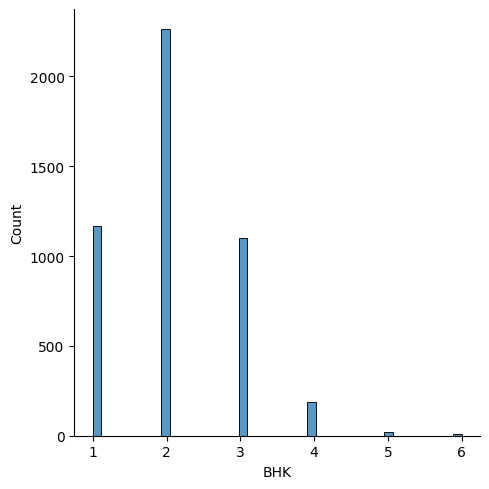

In [10]:
# displot 막대그래프
sns.displot(rent_df['BHK'])

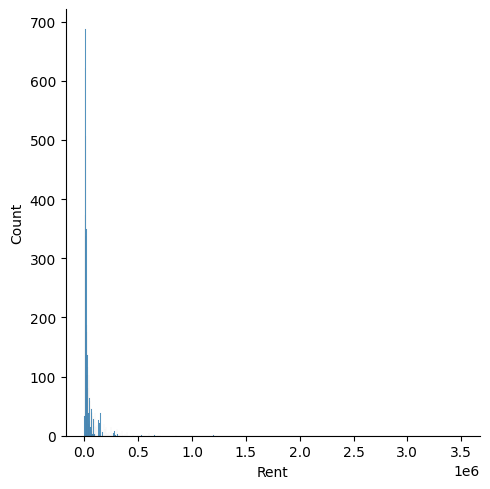

In [11]:
sns.displot(rent_df['Rent'])
# 한쪽으로 가격이 몰려있음 => 보이지 않지만 3.5까지 데이터있어서 보임

In [12]:
# sort_values(): 데이터를 정렬
rent_df['Rent'].sort_values()

4076       1200
285        1500
471        1800
2475       2000
146        2200
         ...   
1459     700000
1329     850000
827     1000000
1001    1200000
1837    3500000
Name: Rent, Length: 4746, dtype: int64

<Axes: ylabel='Rent'>

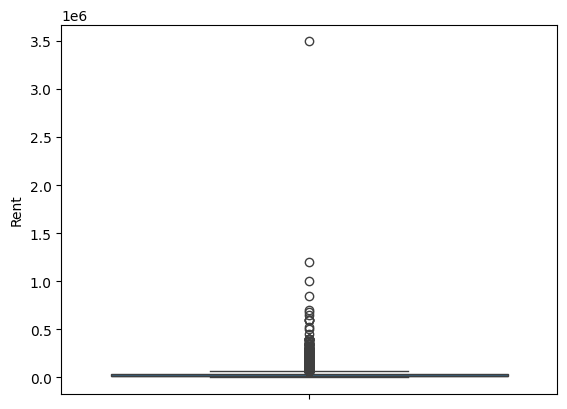

In [13]:
sns.boxplot(y=rent_df['Rent'])

<Axes: ylabel='BHK'>

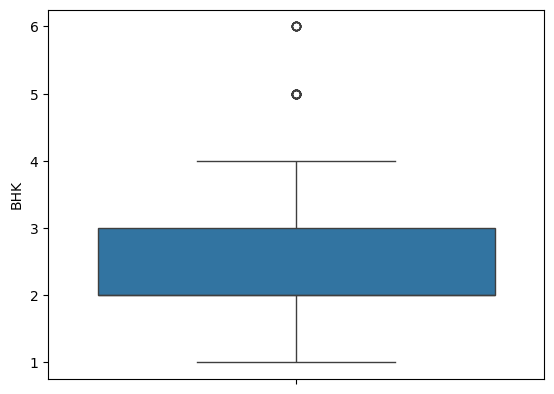

In [14]:
sns.boxplot(y=rent_df['BHK'])

In [15]:
# null값 확인
rent_df.isna().sum()

Posted On            0
BHK                  3
Rent                 0
Size                 5
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [16]:
# 몇 %인지 확인
rent_df.isna().mean()

Posted On            0.000000
BHK                  0.000632
Rent                 0.000000
Size                 0.001054
Floor                0.000000
Area Type            0.000000
Area Locality        0.000000
City                 0.000000
Furnishing Status    0.000000
Tenant Preferred     0.000000
Bathroom             0.000000
Point of Contact     0.000000
dtype: float64

In [17]:
# BHK 있는 null값 삭제
rent_df.dropna(subset=['BHK'])

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2.0,10000,1100.0,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2.0,20000,800.0,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2.0,17000,1000.0,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2.0,7500,850.0,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
5,2022-04-29,2.0,7000,600.0,Ground out of 1,Super Area,Thakurpukur,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2.0,15000,1000.0,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3.0,29000,2000.0,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3.0,35000,1750.0,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3.0,45000,1500.0,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


In [18]:
# Size에 있는 결측치 데이터를 삭제
rent_df.dropna(subset=['Size'])

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2.0,10000,1100.0,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2.0,20000,800.0,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2.0,17000,1000.0,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,NaN,10000,800.0,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2.0,7500,850.0,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2.0,15000,1000.0,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3.0,29000,2000.0,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3.0,35000,1750.0,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3.0,45000,1500.0,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


In [19]:
# rent_df에서 Size 열에 NaN (결측치) 값이 있는 행의 인덱스를 얻는 방법
na_index = rent_df[rent_df['Size'].isna()].index
na_index

Index([425, 430, 4703, 4731, 4732], dtype='int64')

In [20]:
# .loc[na_index]: 결측치를 채운 후에는 .loc[na_index]를 사용하여 na_index에 해당하는 행들을 선택
rent_df['Size'].fillna(rent_df['Size'].median()).loc[na_index]

425     850.0
430     850.0
4703    850.0
4731    850.0
4732    850.0
Name: Size, dtype: float64

In [21]:
# 숫자형 열의 중앙값을 계산하여 fillna() 함수를 사용해 결측값 채우기
rent_df = rent_df.fillna(rent_df.median(numeric_only=True))

In [22]:
# 결측값의 비율
rent_df.isna().mean()

Posted On            0.0
BHK                  0.0
Rent                 0.0
Size                 0.0
Floor                0.0
Area Type            0.0
Area Locality        0.0
City                 0.0
Furnishing Status    0.0
Tenant Preferred     0.0
Bathroom             0.0
Point of Contact     0.0
dtype: float64

In [23]:
rent_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Posted On          4746 non-null   object 
 1   BHK                4746 non-null   float64
 2   Rent               4746 non-null   int64  
 3   Size               4746 non-null   float64
 4   Floor              4746 non-null   object 
 5   Area Type          4746 non-null   object 
 6   Area Locality      4746 non-null   object 
 7   City               4746 non-null   object 
 8   Furnishing Status  4746 non-null   object 
 9   Tenant Preferred   4746 non-null   object 
 10  Bathroom           4746 non-null   int64  
 11  Point of Contact   4746 non-null   object 
dtypes: float64(2), int64(2), object(8)
memory usage: 445.1+ KB


In [24]:
# object를 숫자로 바꿔야함
rent_df['Floor'].value_counts()  # 종류 너무 많아서 뺌 => 원핫인코딩 힘듬

Floor
1 out of 2         379
Ground out of 2    350
2 out of 3         312
2 out of 4         308
1 out of 3         293
                  ... 
11 out of 31         1
50 out of 75         1
18 out of 26         1
12 out of 27         1
23 out of 34         1
Name: count, Length: 480, dtype: int64

In [25]:
# Area Type은 텍스트 형태이기 때문에 모델에서 계산을 할 수 없음
# 라벨 인코딩을 통해 숫자로 변경
rent_df['Area Type'].value_counts()  # 원핫인코딩 할수있음

Area Type
Super Area     2446
Carpet Area    2298
Built Area        2
Name: count, dtype: int64

In [26]:
# unique() 몇 종류있는지 이름만 가져옴
rent_df['Area Type'].unique()  # 이름만

array(['Super Area', 'Carpet Area', 'Built Area'], dtype=object)

In [27]:
# 유니크한 종류의 개수
rent_df['Area Type'].nunique()  # 갯수

3

In [28]:
for i in ['Floor', 'Area Type', 'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred', 'Point of Contact']:
    print(i, rent_df[i].nunique())  # 각 갯수 알아낼수있음

Floor 480
Area Type 3
Area Locality 2235
City 6
Furnishing Status 3
Tenant Preferred 3
Point of Contact 3


In [29]:
# inplace=True 바로 적용됨, axis=1 열
# 원핫인코딩에서 제외할 열 삭제
rent_df.drop(['Posted On', 'Floor', 'Area Locality', 'Tenant Preferred', 'Point of Contact'], axis=1, inplace=True)

In [30]:
# 필요한것만 남음
rent_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   BHK                4746 non-null   float64
 1   Rent               4746 non-null   int64  
 2   Size               4746 non-null   float64
 3   Area Type          4746 non-null   object 
 4   City               4746 non-null   object 
 5   Furnishing Status  4746 non-null   object 
 6   Bathroom           4746 non-null   int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 259.7+ KB


In [31]:
#원핫인코딩
# get_dummies() 함수를 사용하면 선택한 열을 원핫 인코딩된 더미 변수로 변환한 새로운 데이터프레임이 반환
rent_df = pd.get_dummies(rent_df, columns = ['Area Type', 'City', 'Furnishing Status'])
rent_df.head()

,BHK,Rent,Size,Bathroom,Area Type_Built Area,Area Type_Carpet Area,Area Type_Super Area,City_Bangalore,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,Furnishing Status_Furnished,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished
0,2.0,10000,1100.0,2,False,False,True,False,False,False,False,True,False,False,False,True
1,2.0,20000,800.0,1,False,False,True,False,False,False,False,True,False,False,True,False
2,2.0,17000,1000.0,1,False,False,True,False,False,False,False,True,False,False,True,False
3,2.0,10000,800.0,1,False,False,True,False,False,False,False,True,False,False,False,True
4,2.0,7500,850.0,1,False,True,False,False,False,False,False,True,False,False,False,True


In [32]:
X = rent_df.drop('Rent', axis=1) # 독립변수 # X는 다차원이라 대문자
y = rent_df['Rent'] # 종속변수  # y는 1차원(단일값)이라서 소문자

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)

In [35]:
X_train.shape, X_test.shape

((3796, 15), (950, 15))

In [36]:
y_train.shape, y_test.shape

((3796,), (950,))

# **2. 선형회귀(Linear Regression)**
* 데이터를 통해 가장 잘 설명할 수 있는 직선으로 데이터를 분석하는 방법
    * 단순 선형 회귀 분석( 단일 독립변수를 이용 )
    * 다중 선형 회귀 분석( 다중 독립변수를 이용 )

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
lr = LinearRegression()

In [39]:
lr.fit(X_train, y_train)  # 선형회기 알고리즘으로 학습시킴 # 오차를 줄여가는 과정=> 학습

LinearRegression()

In [40]:
# 예측
pred = lr.predict(X_test)  # X값 제공하면 y값 예측
pred

array([-2.35007297e+04,  7.45825366e+04,  3.63863935e+04,  3.72509330e+04,
        2.19807388e+04,  1.13988961e+05,  1.32569324e+05,  8.00866977e+04,
       -5.44471161e+03,  4.48481391e+04,  2.56342869e+04,  3.72088769e+04,
        1.95119918e+04, -1.23384388e+04,  7.53917635e+04,  6.25174796e+04,
        5.75357688e+04, -3.22905186e+04,  2.35631827e+04,  1.35133066e+04,
        1.56987036e+03,  3.66518670e+04,  2.04547476e+04,  1.31700745e+04,
        8.32032695e+04,  3.70973131e+04,  1.05916936e+05,  1.05561555e+04,
        2.59879852e+04,  1.69941531e+04,  1.47882533e+04, -2.21969907e+03,
        1.86615528e+04, -7.89699509e+03, -5.87324714e+03,  1.55155472e+04,
        7.09883067e+03,  2.88936106e+04, -2.03512253e+04,  2.87802925e+04,
       -9.89695711e+03,  6.85533489e+04, -3.34460672e+03, -1.71361949e+04,
        3.66518670e+04,  1.31377813e+04,  2.68284448e+04,  2.43263786e+04,
        4.85166538e+03,  3.08879732e+04,  6.93205196e+04,  2.02120589e+04,
        8.65016069e+04, -

# **3. 평가 지표 만들기**

### 3-1.  MSE( Mean Squared Error) 평균 제곱 오차
* 예측값과 실제값의 차이에 대한 제곱에 대해 평균을 낸 값
* ${(\frac{1}{n})\sum_{i=1}^{n}(y_{i} - x_{i})^{2}}$


In [41]:
p = np.array([3,4,5]) # 예측값
act = np.array([1,2,3])  # 실제값

In [42]:
def my_mse(pred, actual):
    return((pred - actual) ** 2).mean()  # mean(): 평균(average)

In [43]:
my_mse(p, act)

4.0

### 3-2. MAE( Mean Absolute Error) 평균 절대 오차
* 예측값과 실제값의 차이에 대한 절대값에 대해 평균을 낸 값
* $(\frac{1}{n})\sum_{i=1}^{n}\left | y_{i} - x_{i} \right |$

지금은 사용하지 않고 다른데 쓰임 =>
절댓값은 미분이 어려워서 기울기와 bias를 업데이트 하기 힘듬

In [44]:
def my_mae(pred, actual):
    return np.abs(pred - actual).mean()  # abs 절댓값

In [45]:
my_mae(p, act)

2.0

###3-3. RMSE( Root Mean Squared Error) 평균 제곱근 오차
* 예측값과 실제값의 차이에 대한 제곱에 대해 평균을 낸 후 루트를 씌운 값
* $\sqrt{(\frac{1}{n})\sum_{i=1}^{n}(y_{i} - x_{i})^{2}}$

In [46]:
def my_rmse(pred, actual):
    return np.sqrt(my_mse(pred, actual))

In [47]:
my_rmse(p, act)

2.0

In [48]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [49]:
# MAE
mean_absolute_error(p, act)

2.0

In [50]:
# MSE
mean_squared_error(p, act)

4.0

In [51]:
# RMSE
mean_squared_error(p, act, squared=False) # RMSE

2.0

###3-4 데이터에 평가지표 적용하기

In [52]:
# MSE  # 값이 크면 안 좋음, 값이 작아야 좋음
mean_squared_error(y_test, pred)

1426204740.330996

In [53]:
# MAE
mean_absolute_error(y_test, pred)

21997.237341647397

In [54]:
# RMSE
mean_squared_error(y_test, pred, squared=False)

37765.125980605386

In [55]:
# 아웃라이어로 생각되는 데이터를 삭제
X_train.drop(1837, inplace=True)
y_train.drop(1837, inplace=True)

In [56]:
lr.fit(X_train, y_train)

LinearRegression()

In [57]:
pred= lr.predict(X_test)

In [58]:
# RMSE
mean_squared_error(y_test, pred, squared=False)

37731.275512059074

In [59]:
# 1837 삭제 전: 37765.125980605386
# 1837 삭제 후: 37731.275512059074
37765.125980605386 - 37731.275512059074
# 33.850468546312186 만큼 오차가 줄었음

33.850468546312186